In [1]:
%load_ext autoreload
%autoreload 2

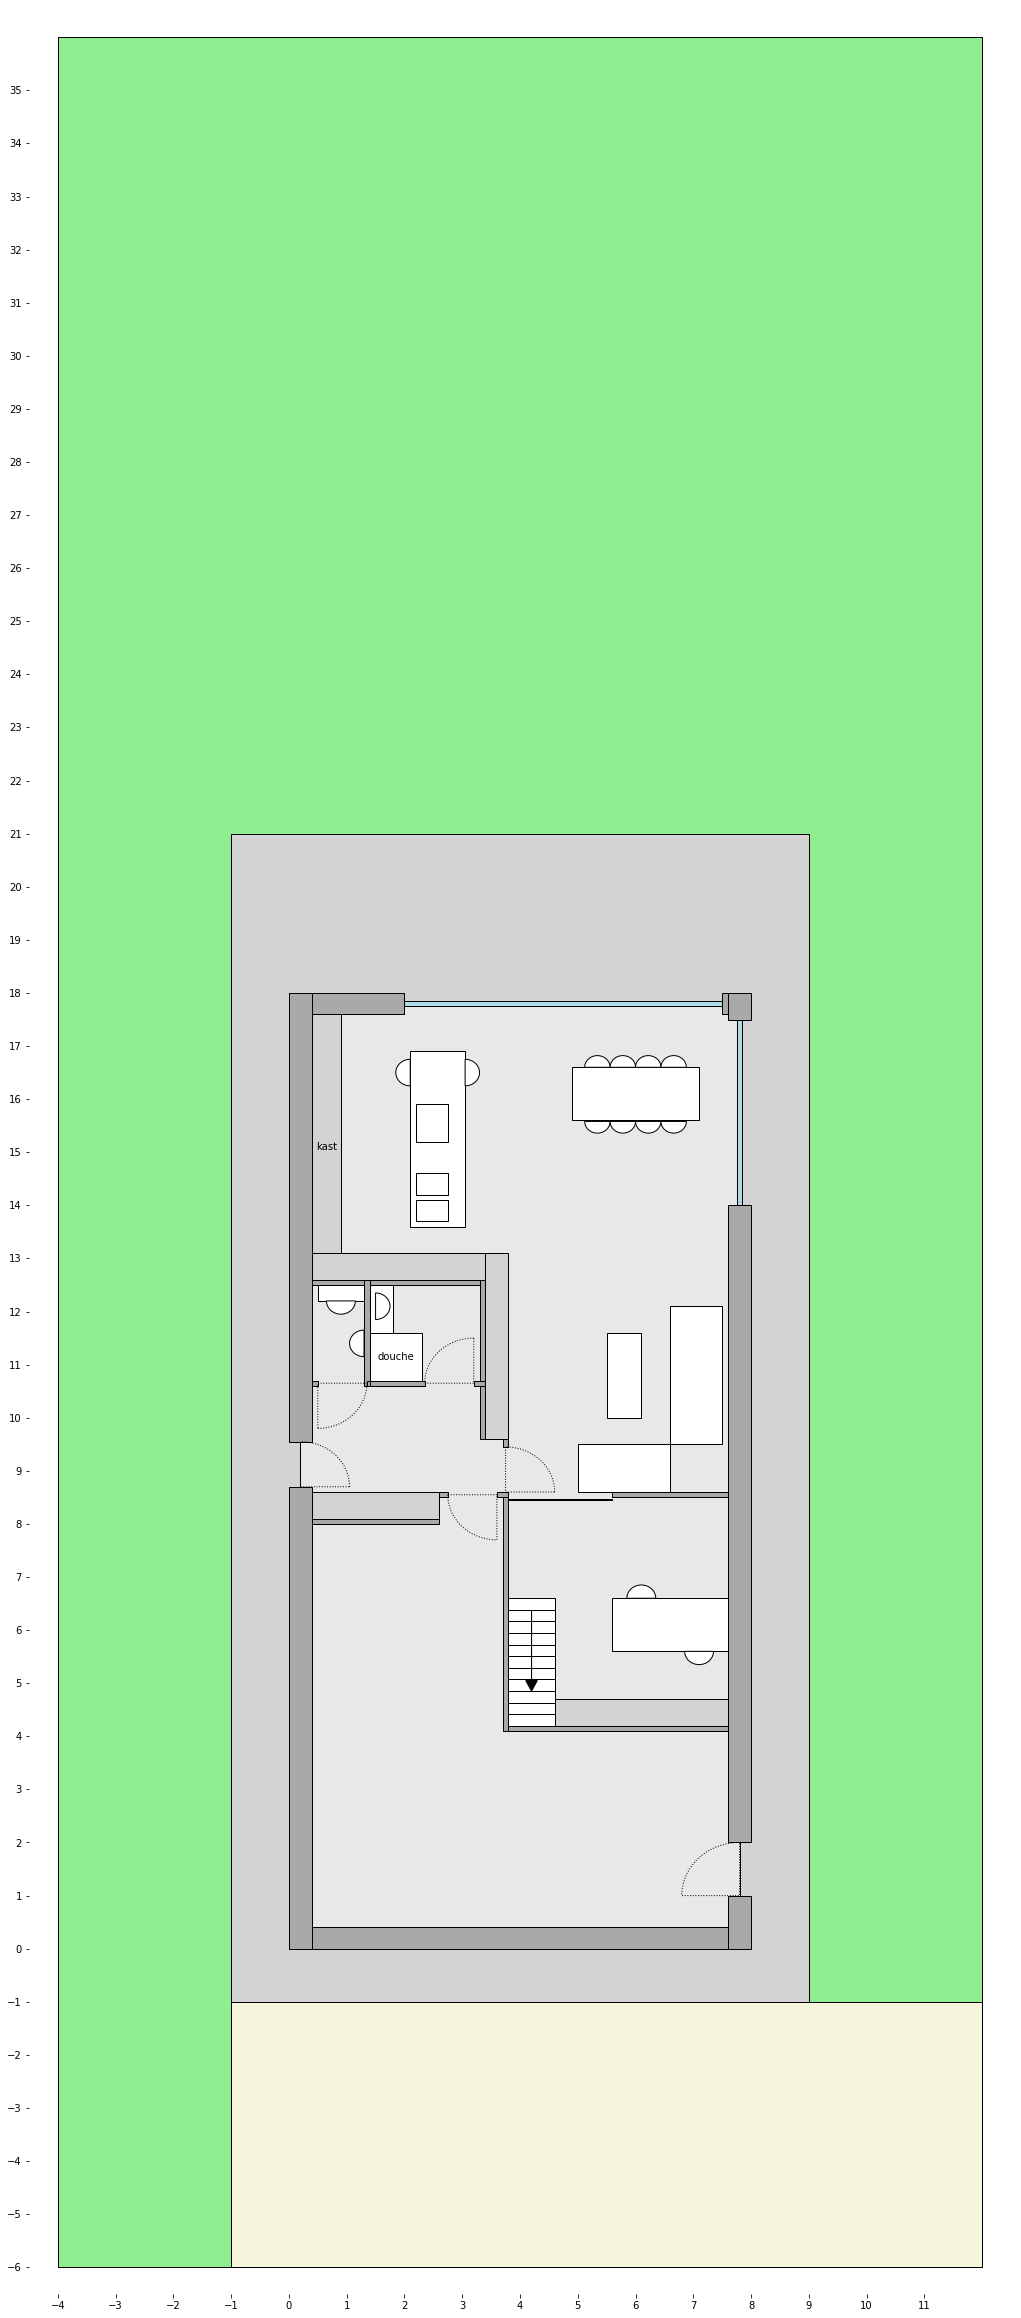

In [3]:
from floorplan2D import FloorPlan, InnerWall, OuterWall,Rect,Wall,HalfCircle,Arrow
import matplotlib.pyplot as plt
import numpy as np

fp = FloorPlan()

binnentop = 18-OuterWall.width
binnenbottom = OuterWall.width
binnenleft = OuterWall.width
binnenright = 8-OuterWall.width

fp.add(Rect(-4,-6,8+4,42-6,"lightgreen"))
fp.add(Rect(-1,-6,8+4,-1,"#f5f5dc"))
fp.add(Rect(-1,-1,8+1,18+3,"lightgrey"))
fp.add(Rect(OuterWall.width/2,
    OuterWall.width/2,
    8-OuterWall.width/2,
    18-OuterWall.width/2,
    "#e8e8e8"))


#OUTER WALLS
fp.add
o = OuterWall.horizontal(0,0,8,"bottom")
fp.add(o)

o = OuterWall.horizontal(18,0,8,"top")
o.window(2,7.5)
fp.add(o)

lo = OuterWall.vertical(0,0,18,"left")
fp.add(lo)

o = OuterWall.vertical(8,0,18,"right")
o.window(14,17.5)
o.door(1,"top","left",1)
fp.add(o)


# Keukenkast
keukenkasttop = binnentop
keukenkastbottom = binnentop - 5
keukenkastleft = binnenleft
keukenkastright = binnenleft + 0.5
r = Rect(keukenkastleft,
         keukenkastbottom,
         keukenkastright,
         keukenkasttop,
        "lightgrey",
        "kast")
fp.add(r)
fp.add(Rect(binnenleft,keukenkastbottom,binnenleft + 3,keukenkastbottom + 0.5,"lightgrey"))
#fp.add(Rect(binnenleft,keukenkasttop-0.5,binnenleft + 1.5,keukenkasttop,"lightgrey"))
# kookeiland

kookeilandtop = binnentop - 0.7
kookeilandbottom = binnentop - 4
kookeilandleft = keukenkastright + 1.2
kookeilandright = kookeilandleft + 0.95
r = Rect(kookeilandleft,
         kookeilandbottom,
         kookeilandright,
         kookeilandtop,"white")
         #"kook\neiland","white")
fp.add(r)

vuurtop = kookeilandtop - 1
vuurbottom = vuurtop- 0.70
vuurleft = kookeilandleft + 0.1
vuurright = kookeilandright - 0.3
fp.add(Rect(vuurleft,vuurbottom,vuurright,vuurtop))

afwasbak1bottom = kookeilandbottom + 0.1
afwasbak1top = afwasbak1bottom + 0.40
afwasbakleft = kookeilandleft+0.1
afwasbakright = kookeilandright -0.3
fp.add(Rect(afwasbakleft,afwasbak1bottom,afwasbakright,afwasbak1top))
afwasbak2bottom = afwasbak1top + 0.1
afwasbak2top = afwasbak2bottom + 0.40
fp.add(Rect(afwasbakleft,afwasbak2bottom,afwasbakright,afwasbak2top))

fp.add(HalfCircle(kookeilandleft,kookeilandtop-0.4,0.25,"left"))
fp.add(HalfCircle(kookeilandright,kookeilandtop-0.4,0.25,"right"))

# Tafel

tafeltop = binnentop - 1
tafelbottom = tafeltop - 1
tafelright = binnenright - 0.5
tafelleft = tafelright - 2.2
r = Rect(tafelleft,tafelbottom,tafelright,tafeltop,"white")
fp.add(r)

nb_stoelen = 4
for x in np.linspace(tafelleft,tafelright,nb_stoelen+2)[1:-1]:
    r = (tafelright-tafelleft)/(nb_stoelen+1)/2
    fp.add(HalfCircle(x,tafeltop,r,"top"))
    fp.add(HalfCircle(x,tafelbottom-0.02,r,"bottom"))

# badkamer + toilet
badkamertop = keukenkastbottom
badkamerbottom = badkamertop - 2
badkamerleft = binnenleft + 1
badkamerright = badkamerleft + 2
w = InnerWall.horizontal(badkamertop,badkamerleft,badkamerright,"top")
fp.add(w)
w = InnerWall.vertical(badkamerright,badkamerbottom,badkamertop,"right")
fp.add(w)
w = InnerWall.horizontal(badkamerbottom,badkamerleft,badkamerright,"bottom")
w.door(badkamerright-InnerWall.width-0.10,"left","top")
fp.add(w)

# toilet
toilettop = badkamertop
toiletbottom = badkamerbottom
toiletleft = binnenleft
toiletright = toiletleft + 1
w = InnerWall.horizontal(toilettop,toiletleft,toiletright,"top")
fp.add(w)
fp.add(InnerWall.vertical(toiletright,toiletbottom,toilettop,"right"))
w = InnerWall.horizontal(toiletbottom,toiletleft,toiletright,"bottom")
w.door(toiletright-0.9,"right","bottom")
fp.add(w)

#douche
fp.add(Rect(badkamerleft,
            badkamerbottom + InnerWall.width,
            badkamerleft+0.9,
            badkamerbottom + InnerWall.width+ 0.9,text="douche"))
#lavabo
fp.add(Rect(badkamerleft,
            badkamertop-1,
            badkamerleft+0.4,
            badkamertop-InnerWall.width
           ))
fp.add(HalfCircle(badkamerleft+0.1,
                  badkamertop-0.5,
                 0.25,"right"))

fp.add(Rect(toiletleft+0.1,toilettop-0.4,toiletright-0.1,toilettop-0.1))
fp.add(HalfCircle((toiletleft+toiletright)/2,toilettop-0.4,0.25,"bottom"))
fp.add(HalfCircle(toiletright-InnerWall.width,toiletbottom+0.8,0.25,"left"))


# bedright = bureauright
# bedleft = bedright-2
# bedbottom = bureaubottom + 0.6
# bedtop = bedbottom + 1.80
# fp.add(Rect(bedleft,bedbottom,bedright,bedtop,text="bed"))

# zetel
zetelbottom = binnentop - 9
zetelkorttop = zetelbottom + 0.9
zetellangtop = zetelbottom + 3.50
zetelright = binnenright - 0.1
zetellangleft = zetelright - 0.9
zetelkortleft = zetelright - 2.5
fp.add(Rect(zetelkortleft,zetelbottom,zetellangleft,zetelkorttop,))
fp.add(Rect(zetellangleft,zetelkorttop,zetelright,zetellangtop))

fp.add(Rect(zetelkortleft+0.5,zetelkorttop+0.5,zetellangleft-0.5,zetellangtop-0.5))

#livingkast

livingkasttop = badkamertop + 0.5
livingkastbottom = badkamerbottom - 1
livingkastleft = badkamerright
livingkastright = livingkastleft + 0.4
fp.add(Rect(livingkastleft,livingkastbottom,livingkastright,livingkasttop,"lightgrey"))


# bureautafel
bureautafelleft = binnenright - 2
bureautafelright = binnenright
bureautafeltop = zetelbottom - 2
bureautafelbottom = bureautafeltop - 1

fp.add(Rect(bureautafelleft,bureautafelbottom,bureautafelright,bureautafeltop))

fp.add(HalfCircle(bureautafelleft+0.5,bureautafeltop,0.25,"top"))
fp.add(HalfCircle(bureautafelright-0.5,bureautafelbottom,0.25,"bottom"))

# bureau
bureautop = bureautafeltop
bureaubottom = bureautafelbottom - 1.5
bureauright = binnenright
bureauleft = livingkastright
# w1 = InnerWall.horizontal(bureautop,bureauleft,bureauright,"top")
w1 = InnerWall.horizontal(bureaubottom,bureauleft,bureauright,"bottom")
#w2 = InnerWall.vertical(bureauleft,bureaubottom,bureautop,"left")
# w3.door(bureautop-0.2,"bottom","right")
fp.add(w1);#fp.add(w2);#fp.add(w3)

# Kasten
#fp.add(Rect(bureauleft,bureautop,binnenright,bureautop+0.5,color="lightgrey"))
#fp.add(Rect(binnenright-0.5,bureautop,binnenright,12,color="lightgrey"))

# # TV
# tvtop = koelebergingtop
# tvbottom = vestiairebottom
# tvleft = koelebergingright
# tvright = tvleft + 0.3
# fp.add(Rect(tvleft,tvbottom,tvright,tvtop,text="TV"))

# Trap
traptop = bureautop
trapbottom = bureaubottom + InnerWall.width
trapleft = bureauleft
trapright = bureauleft+0.8
fp.add(Rect(trapleft,trapbottom,trapright,traptop))
n_treden = 12
ycos = np.linspace(traptop,trapbottom,n_treden)
for i,j in zip(ycos[:-1],ycos[1:]):
    fp.add(Rect(trapleft,i,trapright,j))
fp.add(Arrow((trapleft+trapright)/2,traptop - 0.25, 0,-1.5))

#bureaukast
bureaukastbottom = bureaubottom + InnerWall.width
bureaukasttop = bureaukastbottom + 0.5
bureaukastleft = trapright
bureaukastright = bureauright

fp.add(Rect(bureaukastleft,bureaukastbottom,bureaukastright,bureaukasttop,"lightgrey"))

# bureaumuur
w = InnerWall.horizontal(toiletbottom - 2,binnenright-2,binnenright,"top")
fp.add(w)
fp.add(Rect(bureauleft,toiletbottom-2-0.15,binnenright-2,toiletbottom-2-0.15+0.02,"black"))

# HAl
haltop = badkamerbottom
halbottom = toiletbottom - 2
halleft = binnenleft
halright = badkamerright
w = InnerWall.vertical(halright,haltop,livingkastbottom,"right")
fp.add(w)
w = InnerWall.vertical(livingkastright,bureaubottom,livingkastbottom,"right")
w.door(livingkastbottom - 1,"top","right")
fp.add(w)
w = InnerWall.horizontal(halbottom,livingkastright-1.2,livingkastright,"top")
w.door(livingkastright-0.2,"left","bottom")
fp.add(w)
w = InnerWall.horizontal(halbottom-0.5,binnenleft,livingkastright-1.2,"top")
fp.add(w)

lo.door(halbottom+0.1,"top","right")



dressingtop = halbottom
dressingbottom = halbottom - 0.5
dressingleft = binnenleft
dressingright = livingkastright - 1.2
fp.add(Rect(dressingleft,dressingbottom,dressingright,dressingtop,"lightgrey"))

fp.draw(figsize=1)

slpk1 5.0 2.5 12.5
slpk2 2.6 4.699999999999999 12.219999999999999
slpk3 4.0 3.0 12.0


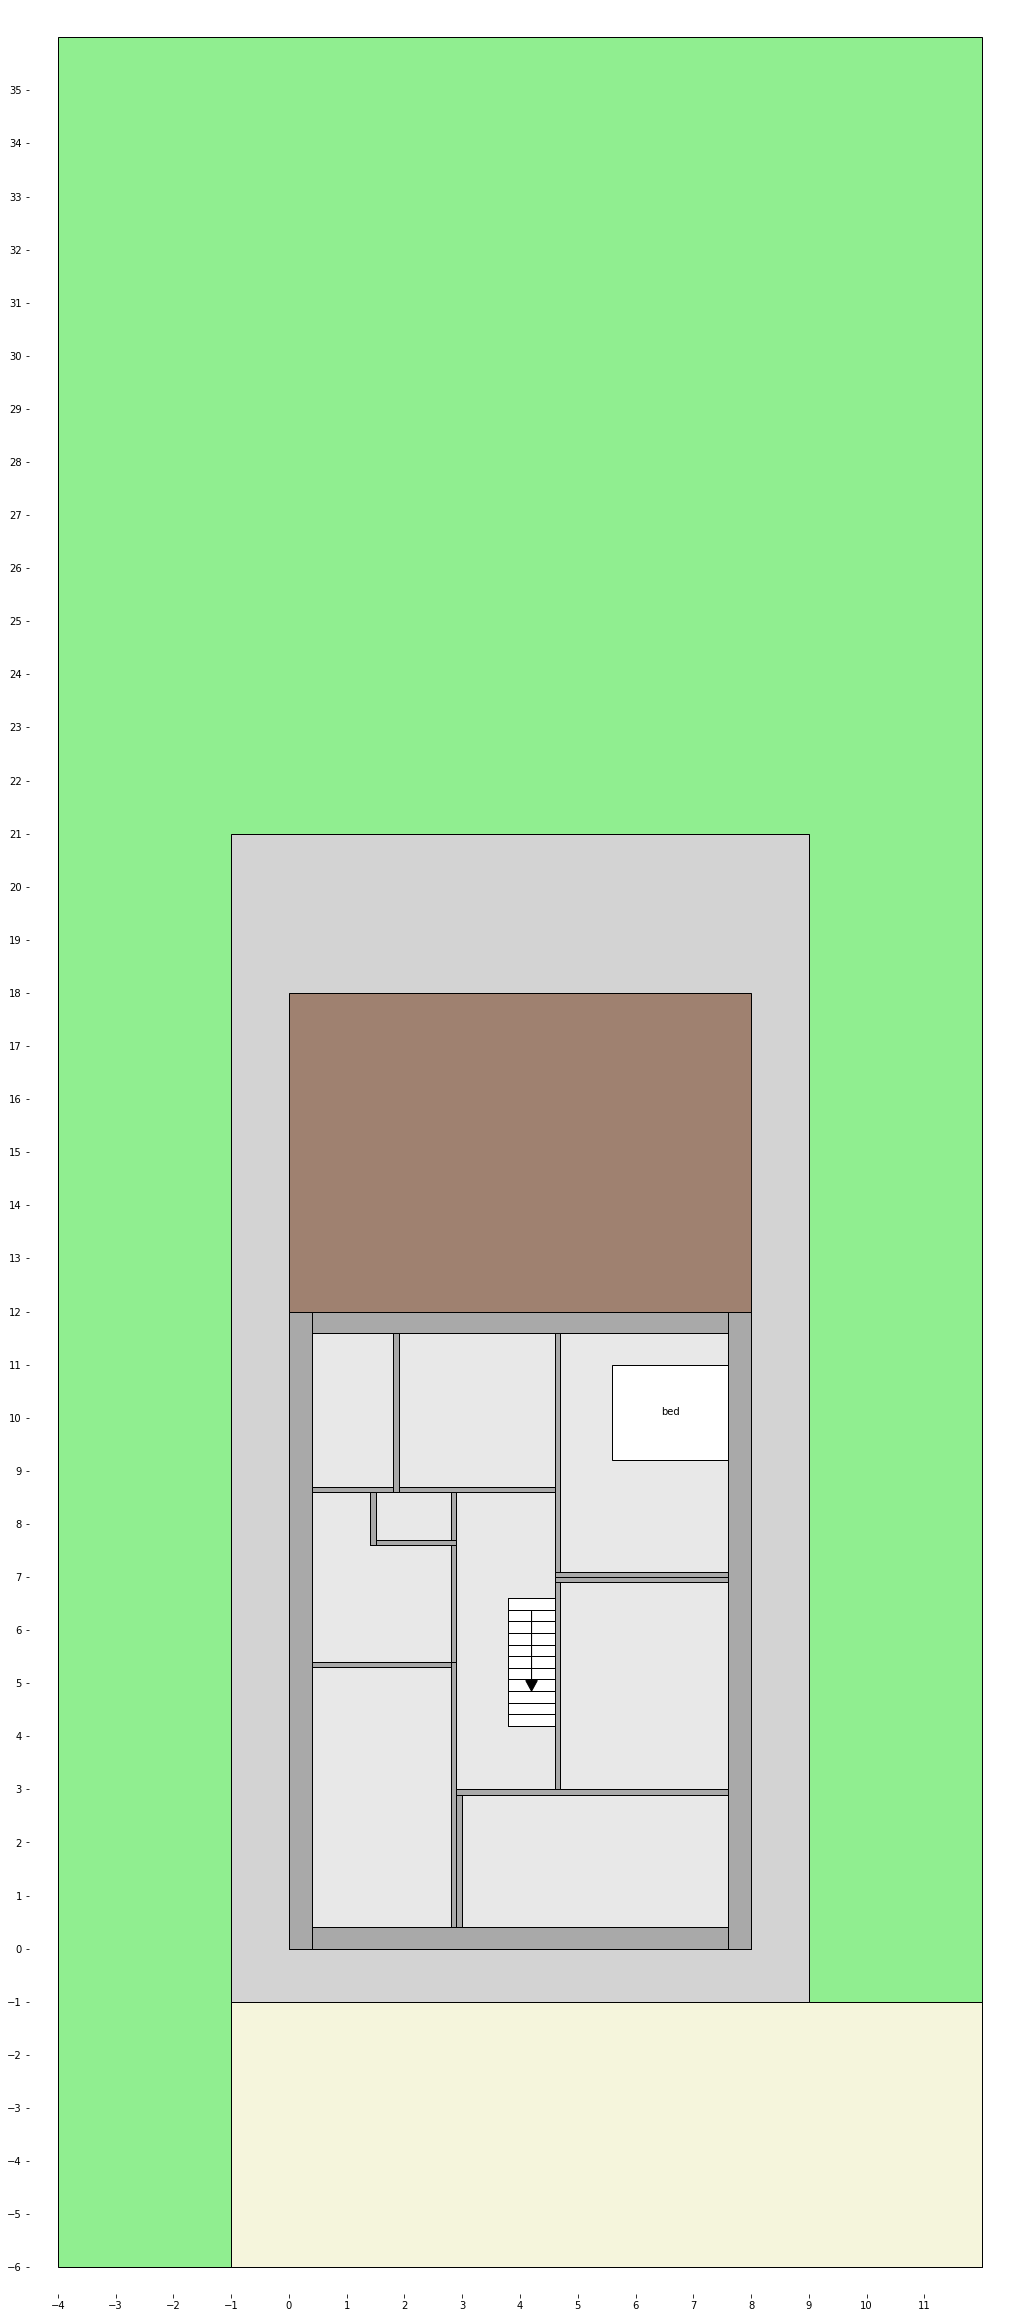

In [39]:
from floorplan2D import FloorPlan, InnerWall, OuterWall,Rect,Wall,HalfCircle,Arrow
import matplotlib.pyplot as plt
import numpy as np

fp = FloorPlan()

binnentop = 12-OuterWall.width
binnenbottom = OuterWall.width
binnenleft = OuterWall.width
binnenright = 8-OuterWall.width

fp.add(Rect(-4,-6,8+4,42-6,"lightgreen"))
fp.add(Rect(-1,-6,8+4,-1,"#f5f5dc"))
fp.add(Rect(-1,-1,8+1,18+3,"lightgrey"))
fp.add(Rect(0,0,8,18,"#9f8170"))
fp.add(Rect(OuterWall.width/2,
    OuterWall.width/2,
    8-OuterWall.width/2,
    12-OuterWall.width/2,
    "#e8e8e8"))


#OUTER WALLS
fp.add
o = OuterWall.horizontal(0,0,8,"bottom")
fp.add(o)

o = OuterWall.horizontal(12,0,8,"top")
#o.window(8-OuterWall.width-3,8-OuterWall.width)
fp.add(o)

lo = OuterWall.vertical(0,0,12,"left")
fp.add(lo)

o = OuterWall.vertical(8,0,12,"right")
#o.window(10.5,17.5)
#o.door(1,"top","left",1)
fp.add(o)


# Trap
traptop = bureautop
trapbottom = bureaubottom + InnerWall.width
trapleft = bureauleft
trapright = bureauleft+0.8
fp.add(Rect(trapleft,trapbottom,trapright,traptop))
n_treden = 12
ycos = np.linspace(traptop,trapbottom,n_treden)
for i,j in zip(ycos[:-1],ycos[1:]):
    fp.add(Rect(trapleft,i,trapright,j))
fp.add(Arrow((trapleft+trapright)/2,traptop - 0.25, 0,-1.5))

#slaapkamer 1
slpk1bottom = binnenbottom
slpk1top = slpk1bottom + 5
slpk1left = binnenleft
slpk1right = binnenleft+2.5
w = InnerWall.horizontal(slpk1top,slpk1left,slpk1right,"top")
fp.add(w)
w = InnerWall.vertical(slpk1right,slpk1bottom,slpk1top,"right")
fp.add(w)
print("slpk1",slpk1top-slpk1bottom,slpk1right-slpk1left,(slpk1top-slpk1bottom)*(slpk1right-slpk1left))

#slaapkamer 2
slpk2bottom = binnenbottom
slpk2top = slpk2bottom + 2.6
slpk2left = binnenleft+2.5
slpk2right = binnenright
w = InnerWall.vertical(slpk2left,slpk2bottom,slpk2top,"left")
fp.add(w)
w = InnerWall.horizontal(slpk2top,slpk2left,slpk2right,"top")
fp.add(w)
print("slpk2",slpk2top-slpk2bottom,slpk2right-slpk2left,(slpk2top-slpk2bottom)*(slpk2right-slpk2left))

# slaapkamer 3
slpk3bottom = slpk2top
slpk3top = slpk3bottom+4
slpk3left = trapright
slpk3right = binnenright
w = InnerWall.vertical(slpk3left,slpk3bottom,slpk3top,"left")
fp.add(w)
w = InnerWall.horizontal(slpk3top,slpk3left,slpk3right,"top")
fp.add(w)
print("slpk3",slpk3top-slpk3bottom,slpk3right-slpk3left,(slpk3top-slpk3bottom)*(slpk3right-slpk3left))


#master slaapkamer
masterslpktop = binnentop
masterslpkbottom = slpk3top
masterslpkright = binnenright
masterslpkleft = slpk3left
w = InnerWall.vertical(masterslpkleft,masterslpkbottom,masterslpktop,"left")
fp.add(w)
w = InnerWall.horizontal(masterslpkbottom,masterslpkleft,masterslpkright,"bottom")
fp.add(w)
#w = InnerWall.vertical(masterslpkright-3,masterslpkbottom+InnerWall.width+1,masterslpktop,"right")
#fp.add(w)

bedright = masterslpkright
bedleft = bedright-2
bedtop = masterslpktop - 0.6
bedbottom = bedtop -1.80
fp.add(Rect(bedleft,bedbottom,bedright,bedtop,text="bed"))

# badkamer
badkamertop = binnentop
badkamerbottom = binnentop-3
badkamerleft = binnenleft
badkamerright = masterslpkleft
w = InnerWall.horizontal(badkamerbottom,badkamerleft,badkamerright,"bottom")
fp.add(w)

# technische ruimte
techniektop = badkamertop
techniekleft = binnenleft
techniekright = techniekleft + 1.5
techniekbottom = badkamerbottom
w = InnerWall.vertical(techniekright,techniekbottom,techniektop,"right")
fp.add(w)
#w = InnerWall.horizontal(techniektop,techniekleft,techniekright,"top")
#fp.add(w)

# toilet
toilettop = badkamerbottom
toiletleft = binnenleft + 1
toiletright = toiletleft + 1.5
toiletbottom = toilettop-1
w = InnerWall.vertical(toiletright,toiletbottom,toilettop,"right")
fp.add(w)
w = InnerWall.horizontal(toiletbottom,toiletleft,toiletright,"bottom")
fp.add(w)
w = InnerWall.vertical(toiletleft,toiletbottom,toilettop,"left")
fp.add(w)

# dressing
w = InnerWall.vertical(toiletright,toiletbottom,slpk1top,"right")
fp.add(w)

# hal
#w = InnerWall.horizontal(traptop,binnenleft,trapright,"top")
#fp.add(w)
#fp.add()
#print("dressing kinderen:",trapright-binnenleft)

fp.draw(1)